In [1]:
from matplotlib import pyplot as plt
from icnn import ICNN, ICNNBN2
import numpy as np
import torch as t
from utils import variable
from torch.nn import Softplus, BatchNorm1d as BN, SELU

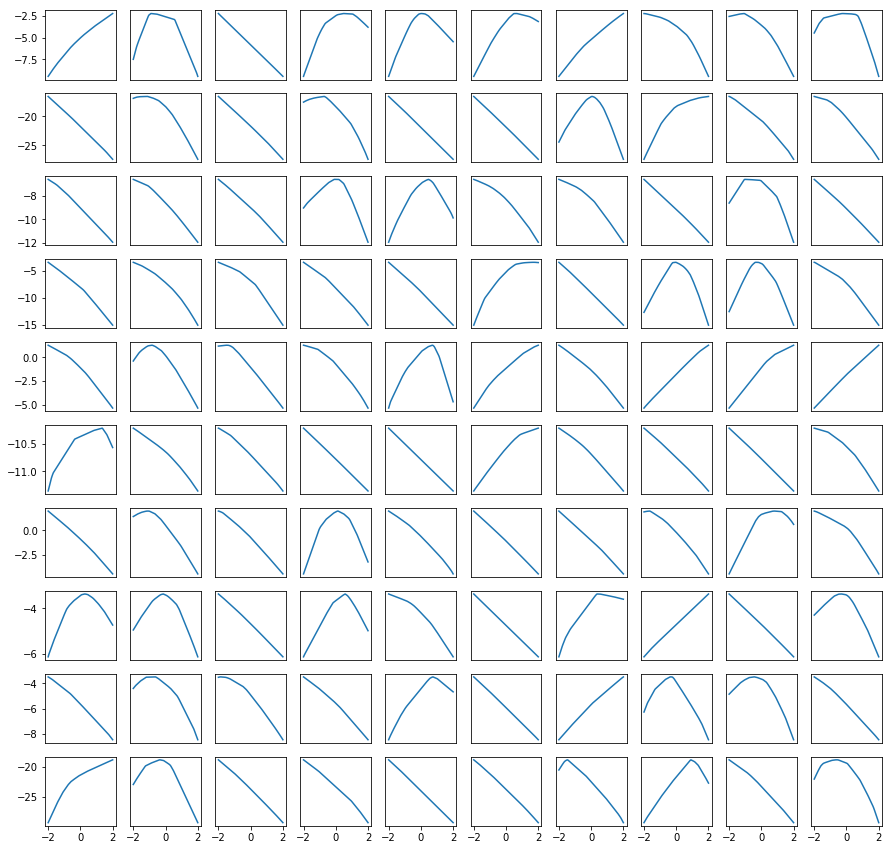

In [2]:
from torch.nn import ELU, LeakyReLU, ReLU

plt.rcParams['figure.figsize'] = (15,15)
fig, axes = plt.subplots(10,10)
icnn = ICNNBN2(3,50,50)
icnn.eval()
a, b = -2,2
for i in range(10):
    for j in range(10):
        state = variable(np.concatenate(100*[np.random.normal(size=(1,50))], 0)).float()
        actions = variable(np.array([[0.,a] for a in np.linspace(a,b,100)])).float()
        Qvalues = icnn.forward(state, actions).data.numpy()
        axes[i,j].plot(np.linspace(a,b,100), Qvalues)
        if i<9:
            axes[i,j].get_xaxis().set_visible(False)
        if j>0:
            axes[i,j].get_yaxis().set_visible(False)
plt.show()


In [3]:
print('#params: %s' % np.sum([np.prod(p.data.numpy().shape) for p in icnn.parameters()]))

#params: 18509
